# Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [247]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

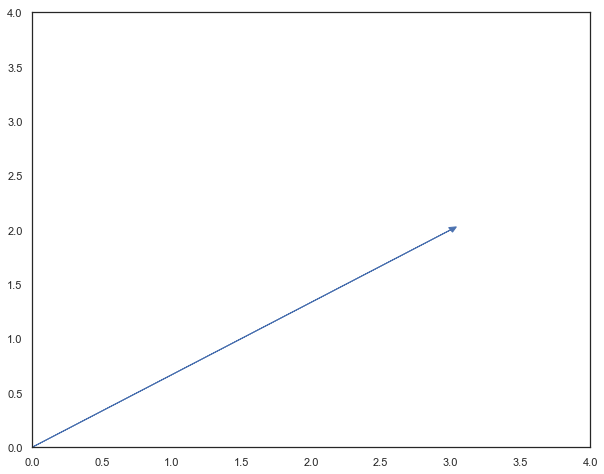

In [266]:
plt.arrow(0, 0, 3, 2, head_width=0.05, head_length=0.05, linestyle='-', color='b')
plt.xlim([0,4])
plt.ylim([0,4]);

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [249]:
# The norm of a vector represents its length, or "magnitude", in `vector.len()` dimensional space.
np.linalg.norm(np.array([17,-4,-2,1]))

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [250]:
# Calculate the dot product
np.dot(np.array([3,7,-2,12]), np.array([9,-7,4,6]))

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [251]:
E = np.array([7,4,2,1,3,-1,2,6,-4]).reshape(3,3)
print('Inverse of E: \n', np.linalg.inv(E))
print('Transpose of E: \n', E.T)

Inverse of E: 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
Transpose of E: 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [252]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [253]:
print('Mean of df: \n', df.mean().to_frame())
print('\nStd. dev. of df: \n', df.std().to_frame())
# Here I'm assuming that the data given is the 'population' data for the week, and not considered
# a sample of, say, the population data for an entire year. So, ddof=0 to find population variance:
print('\nVariance of df: \n', df.var(ddof=0).to_frame())

Mean of df: 
                      0
customers  1135.714286
snow          2.714286

Std. dev. of df: 
                     0
customers  314.264069
snow         2.927700

Variance of df: 
                       0
customers  84653.061224
snow           7.346939


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

They are not comparable in the sense that the variance of customers for the given week is much more extreme than the variance of snow fall.

The number of customers is far more variable in nature than the amount of snow for this week.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [254]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [255]:
data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [256]:
# Standardize data mean
country = df.Country
df = df.drop(columns='Country')
df = df - df.mean()

In [257]:
# Standardize data standard deviation
df = df / df.std()
df

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.570083,-0.015152,-0.224774,0.558227,-0.547700,0.113060,-0.389777,0.747650,0.327129,-0.291214,0.697564,0.638613,-0.557999,-0.044962,-0.376921,0.090931,-0.119774
1,0.464021,-1.106061,1.038240,0.998043,1.330128,1.340571,0.377324,0.947023,1.213892,0.072804,1.014638,0.804795,1.454458,1.393816,-1.216104,0.729040,0.838419
2,0.464021,-0.196970,0.470954,-0.287572,-0.950091,-0.468392,-1.156878,-0.614734,-0.429864,1.310463,-0.760979,-0.049855,-0.740950,-0.404656,1.031200,0.620562,0.646780
3,-1.498124,1.318182,-1.284421,-1.268698,0.167663,-0.985239,1.169331,-1.079939,-1.111157,-1.092053,-0.951223,-1.393554,-0.155508,-0.944198,0.561826,-1.440533,-1.365425


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [258]:
# Initialize, Fit, Transform
pca = PCA(2)
pca.fit(df)
projected_df = pca.transform(df)

projected_df = pd.DataFrame(data=projected_data, columns=['PC1', 'PC2'])
projected_df

,PC1,PC2
0,-0.826612,0.284332
1,-3.915258,-1.502883
2,0.422602,2.800442
3,4.319269,-1.581891


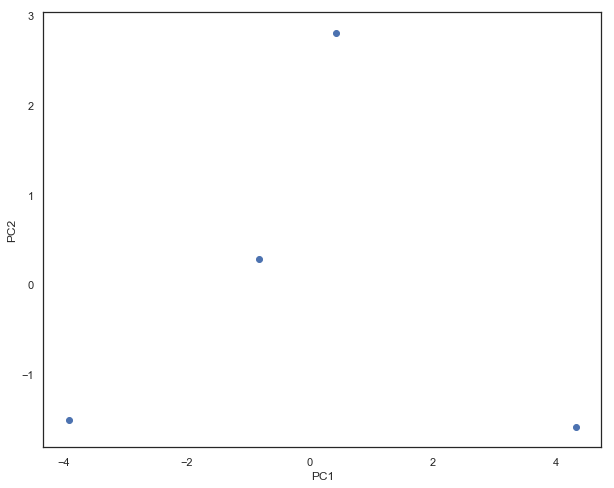

In [259]:
plt.scatter(x=projected_df['PC1'], y=projected_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2');

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [260]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [261]:
# Initialize, Fit, Transform
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(points)
projected_points = scaler.transform(points)

projected_points = pd.DataFrame(data=projected_points, columns=['PC1', 'PC2'])
projected_points.head()

,PC1,PC2
0,-1.215264,0.000286
1,-0.270846,-0.621863
2,0.468740,-1.122373
3,-0.897263,-0.323537
4,0.334265,-1.128378


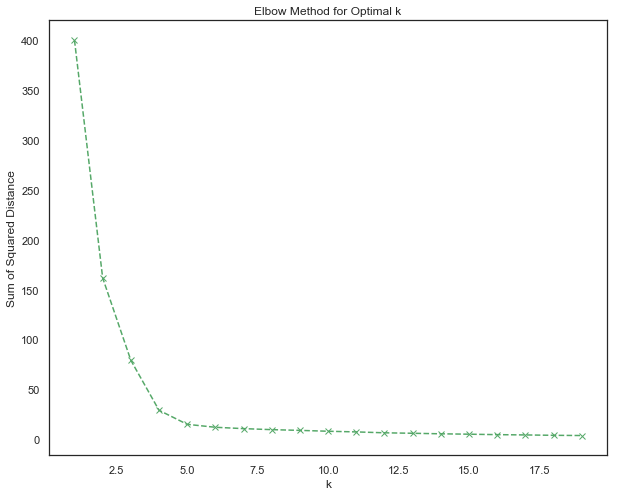

In [262]:
# Use Elbow Method to find optimal k
sum_of_squared_distances = []
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km = km.fit(projected_points)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(range(1,20), sum_of_squared_distances, 'gx--')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method for Optimal k')
plt.show();

In [263]:
# Fit k-Means and append cluster values to projected_points DataFrame for graphing
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_jobs=4).fit(projected_points)
projected_points['cluster'] = pd.Series(kmeans.labels_).values
projected_points.head()

,PC1,PC2,cluster
0,-1.215264,0.000286,3
1,-0.270846,-0.621863,0
2,0.468740,-1.122373,0
3,-0.897263,-0.323537,3
4,0.334265,-1.128378,0


In [264]:
# The plt.mlab.dist() function returns `MatplotlibDeprecationWarning: numpy.hypot` on each pass
# so I'm going to suprress that warning for this code cell

projected_points['cluster_center'] = list(kmeans.cluster_centers_[projected_points['cluster'] - 1])

# Append distance between points and their clusters
a = projected_points[['PC1', 'PC2']].values
b = projected_points['cluster_center']

# Normalize distances for seaborn hue parameter
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    projected_points['dist_from_cluster'] = [plt.mlab.dist(x, y)/len(a) for x,y in zip(a, b)]

projected_points.head()

,PC1,PC2,cluster,cluster_center,dist_from_cluster
0,-1.215264,0.000286,3,"[-0.280325304979355, 1.35735964313469]",0.008240
1,-0.270846,-0.621863,0,"[-1.329612506975541, -0.03404250279065989]",0.006055
2,0.468740,-1.122373,0,"[-1.329612506975541, -0.03404250279065989]",0.010510
3,-0.897263,-0.323537,3,"[-0.280325304979355, 1.35735964313469]",0.008953
4,0.334265,-1.128378,0,"[-1.329612506975541, -0.03404250279065989]",0.009957


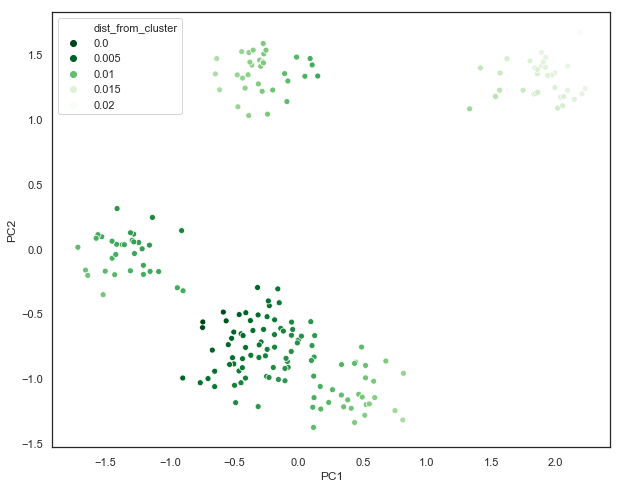

In [265]:
sns.set(rc={'figure.figsize':(10, 8)})
sns.set_context('notebook')
sns.set_style('white')
sns.scatterplot(data=projected_points, x='PC1', y='PC2', hue='dist_from_cluster', palette='Greens_r');